<a href="https://colab.research.google.com/github/JonasSouza871/Estatistica_python/blob/main/Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. A primeira Regressão

--------------------------------

## 1.1 Preparando o ambiente e dataset

------------------

In [2]:
import pandas
import numpy
import scipy
import seaborn
import statsmodels
import statsmodels.api as sm

print(pandas.__version__)
print(numpy.__version__)
print(scipy.__version__)
print(seaborn.__version__)
print(statsmodels.__version__)

2.2.2
2.0.2
1.16.1
0.13.2
0.14.5


- Dados:

In [3]:
dados = pandas.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


- Mesmo dataset que os capítulos anteriores, focados em dados do IBGE

## 1.2. Rodando uma regrassão linear

-----

- Dataset com y sendo o gasto das familia e x é a renda das familias

In [4]:
dataset = {
    'GASTO': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'RENDA': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [5]:
import pandas as pd
dataset = pd.DataFrame(dataset) #transforma os dados acima em um dataset
dataset.head() # mostra os 5 primeiros

,GASTO,RENDA
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [6]:
dataset.describe() #varias estatisticas do dataset

,GASTO,RENDA
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


- Boxplot com os dados:

Text(0.5, 1.0, 'boxplot dados familias')

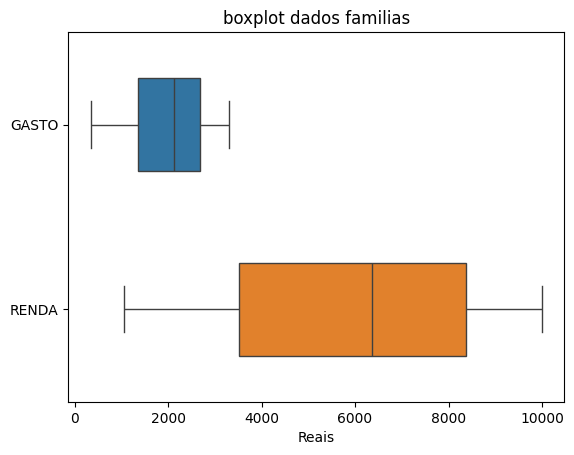

In [7]:
import seaborn as sns
ax = sns.boxplot(data=dataset,orient = 'h', width = 0.5)
ax.set(xlabel='Reais')
ax.set_title("boxplot dados familias")

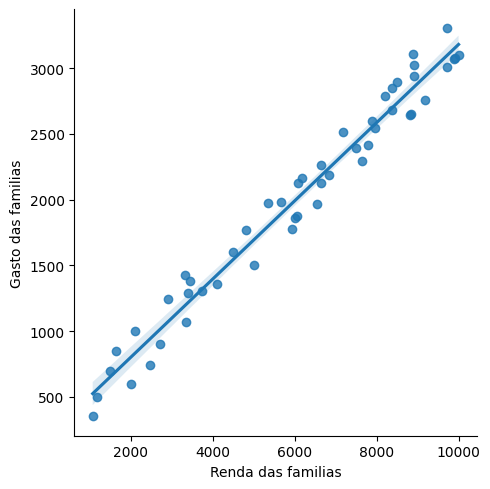

In [8]:
ax = sns.lmplot(x='RENDA', y='GASTO', data=dataset) #plota a regressão apartir do dataset
# Gastos no eixo y e renda no eixo X
ax.set(xlabel='Renda das familias', ylabel='Gasto das familias')

In [9]:
dataset.corr()  #correlação entre as variaveis

,GASTO,RENDA
GASTO,1.000000,0.984835
RENDA,0.984835,1.000000


- Vai de menos -1 a 1 indica o grau de correlação entre eles.

In [10]:
import statsmodels.api as sm

In [11]:
Y = dataset.GASTO # dataframe com o dados de gasto
Y.head()

,GASTO
0,3011
1,1305
2,1879
3,2654
4,2849


In [12]:
x = sm.add_constant(dataset.RENDA) # dataframe com os dados de renda com constante
x.head()

,const,RENDA
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


In [13]:
resultado_regressao = sm.OLS(Y, x).fit() #Modelo de aplicação da regressao linear
print(resultado_regressao.summary())# todos os parametros estimados da regressao

                            OLS Regression Results                            
Dep. Variable:                  GASTO   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           3.56e-38
Time:                        12:37:56   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

- Fazer o obter resultados de uma previsão:

In [14]:
dataset['Y_previsto'] = resultado_regressao.predict() # faz a predição apartir dos valores acima e salva na coluna y_previsto
dataset

,GASTO,RENDA,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


# 2. Correlação

-------

## 2.1 Covariância

-----------------------

- Covariância é uma medida estatística que indica como duas variáveis variam juntas, mostrando se elas aumentam ou diminuem simultaneamente. Valores positivos indicam variação conjunta na mesma direção, e negativos, em direções opostas.

**Covariância populacional**

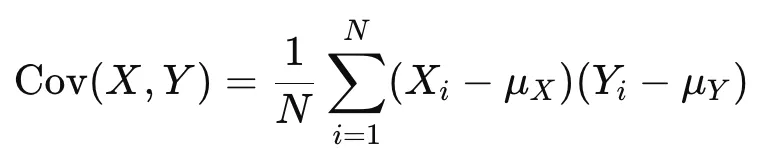



**Covariância Amostral**

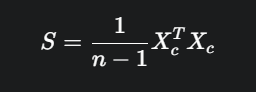

In [15]:
amostra = dados.query('Renda < 5000').sample(n = 20, random_state = 101) #pega 20 dados com rendas menor que 5000 no dataset
# do ibge
amostra

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
5051,14,0,39,8,6,1500,1.616243
72082,52,0,29,8,7,1000,1.752518
5521,15,1,21,8,12,3500,1.694016
13849,22,0,49,2,13,1570,1.804156
14285,22,0,29,8,9,600,1.785481
57207,41,1,34,2,12,1200,1.746864
14720,23,0,32,4,12,2000,1.663362
17552,23,0,32,8,6,500,1.693730
49020,35,0,24,6,7,1300,1.656948
2852,13,0,53,8,5,600,1.667109


In [16]:
amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov() #separa os dados de idade, renda, anos de estudo e altura.
# e calcula as covariancias dessas

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


Esta tabela, chamada de matriz de covariância, mostra como as variáveis se relacionam.
Um valor positivo indica que as variáveis tendem a aumentar juntas (ex: Renda e Anos de Estudo).
Um valor negativo indica que quando uma variável aumenta, a outra tende a diminuir (ex: Renda e Idade).
Os valores na diagonal representam a variância, ou seja, a dispersão dos dados de cada variável.

In [17]:
import pandas as pd
import numpy as np


variaveis = amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']]

n = len(variaveis)
dados_centralizados = variaveis - variaveis.mean()
print(dados_centralizados)
covariancia_manual = (dados_centralizados.T @ dados_centralizados) / (n -1)
# Realiza a multiplicação de matrizes entre a transposta dos dados centralizados e a própria matriz.
# O resultado é a "matriz de espalhamento" (scatter matrix), que contém a soma dos produtos cruzados.
# Esta matriz é o numerador da fórmula da covariância, sendo a base para o cálculo da variância/covariância.


# --- Imprima o resultado ---
print("--- Matriz de Covariância Calculada 'na mão' ---")
print(covariancia_manual)

       Idade   Renda  Anos de Estudo    Altura
5051     0.1   246.7            -2.1 -0.086052
72082   -9.9  -253.3            -1.1  0.050223
5521   -17.9  2246.7             3.9 -0.008279
13849   10.1   316.7             4.9  0.101861
14285   -9.9  -653.3             0.9  0.083186
57207   -4.9   -53.3             3.9  0.044569
14720   -6.9   746.7             3.9 -0.038933
17552   -6.9  -753.3            -2.1 -0.008565
49020  -14.9    46.7            -1.1 -0.045347
2852    14.1  -653.3            -3.1 -0.035186
10813  -10.9   246.7            -1.1 -0.023649
20492  -10.9  1746.7             7.9 -0.029197
5695     7.1 -1253.3             3.9  0.083028
32011   19.1  -703.3            -5.1 -0.093218
47340    2.1   246.7             3.9  0.081088
47339    4.1   346.7             0.9 -0.031354
42311   -7.9  -507.3            -7.1 -0.063064
54693   16.1  -253.3            -2.1 -0.016144
11856   13.1 -1253.3            -7.1  0.008491
31171   15.1   146.7            -2.1  0.026541
--- Matriz de

**Variância**

A variância é uma medida de dispersão que indica o quão distantes os valores de um conjunto de dados estão de sua média. Essencialmente, ela representa a média dos quadrados das diferenças entre cada ponto de dado e a média do conjunto. Um valor alto significa que os dados estão muito espalhados; um valor baixo, que estão agrupados.


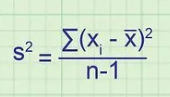

- Fazendo sem nnenhuma bilioteca:

In [18]:
n = len(amostra.Idade)
media = sum(amostra.Idade)/n #media dos valores de idade
soma_dos_quadrados = 0
for i in amostra.Idade:
        soma_dos_quadrados += (i - media) ** 2
variancia = soma_dos_quadrados / (n-1)
print(variancia)

134.4105263157895


In [19]:
print(amostra.Idade.var())
print(amostra.Renda.var())
print(amostra.Altura.var())

134.4105263157895
764668.3263157895
0.003354154161514005


- Bate justamente com os valores das diagonais da matriz de covariancia, exemplo na matriz temos idaide(coluna) e idade (linha) dando justamento o valor de 134.41

## 2.2. Interpretação da covariância


---------

- Quando a covariância tem um valor positivo, temos uma associação linear positiva, onde quando x aumenta y aumenta junto.

- Quando a covariância tem um valor negativo, temos um associação linear negativa, quando x aumenta y cai, Ou seja, relação contrária.

- Teste renda e idade

-4947.968421052631


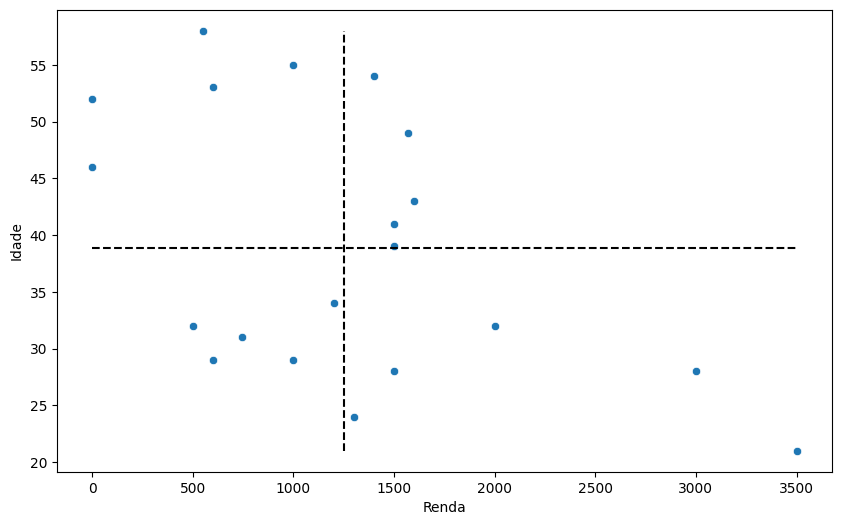

In [24]:
x = amostra.Renda
y = amostra.Idade
covariancia = np.cov(x,y)[0][1]
print(covariancia)
#
ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

 - Temos uma covância e negativo, e tambem no grafico temos um puxamento maior para direita para baixo, o que significa uma covariancia negativa  e relação negativa entre os termos

- Uma relação positiva (pela matriz temos renda e anos de estudo)

2209.021052631579


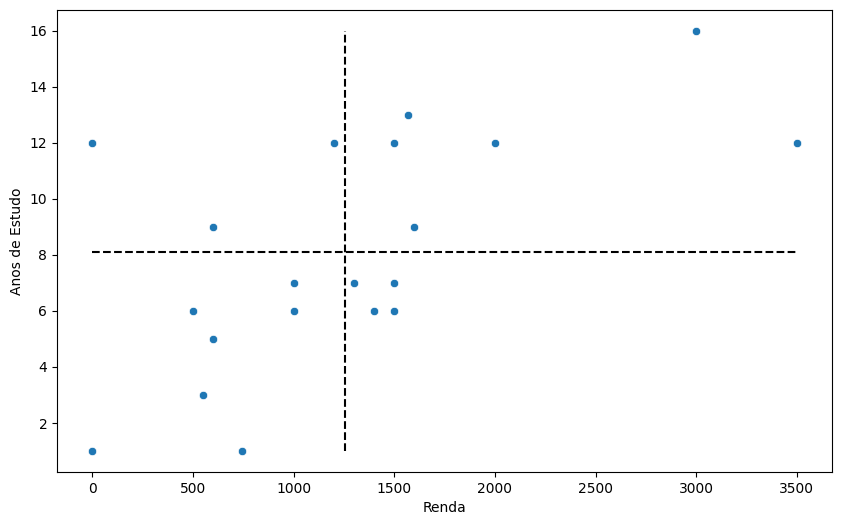

In [26]:
x = amostra.Renda
y = amostra['Anos de Estudo']
covariancia = np.cov(x,y)[0][1]
print(covariancia)

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

- Vemos uma covariancia fortemente positiva e tambem ponto na parte de cima indo para direita indicando claramente uma inclinação positiva.

- Testando uma covariancia nula (pela tabela temos idade e altura sendo praticamente nula)

0.01650587417894737


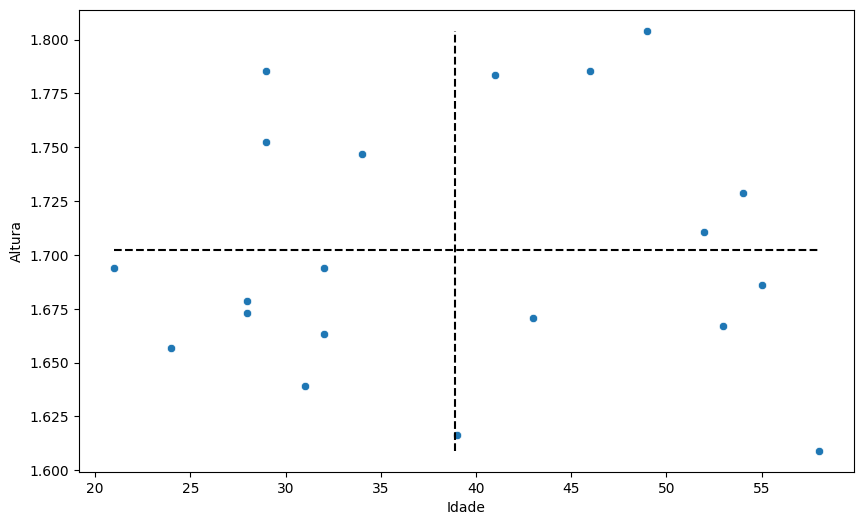

In [27]:
x = amostra.Idade
y = amostra.Altura
covariancia = np.cov(x,y)[0][1]
print(covariancia)

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

- Gráfico extremamente disperso, onde não da para afirmar nada visualmente.